In [1]:
###### Config #####
import sys, os, platform
if os.path.isdir("ds-assets"):
  !cd ds-assets && git pull
else:
  !git clone https://github.com/lutzhamel/ds-assets.git
colab = True if 'google.colab' in os.sys.modules else False
system = platform.system() # "Windows", "Linux", "Darwin"
home = "ds-assets/assets/"
sys.path.append(home)  

Already up to date.


In [2]:
# Notebook level imports
import pandas as pd
from sklearn import tree
import seaborn as sns; sns.set_theme()

# Data Visualization - Another Look

We looked at some basic visualization techniques built into Pandas in slide set [05 Processing Pipeline](https://nbviewer.jupyter.org/github/lutzhamel/ds/blob/master/notes/05-processing-pipeline.ipynb).  Here we take a look a the **Seaborn visualization library**.  The Seaborn library is particularly useful when we have to construct more complicated graphs like scatter plots or plots of models.

We'll use the 'iris' dataset as an example.
Get our data set.  Drop the `id` column because there is no information there.

In [3]:
iris_df = pd.read_csv(home+"iris.csv")\
            .drop(columns=['id'])
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Seaborn Based Visualization

[Seaborn](http://seaborn.pydata.org) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.  Seaborn integrates nicely with Pandas dataframes.

# Histograms

The **histogram** for displaying basic distribution information of **numeric columns**.In the Seaborn this is done with [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html).

<Axes: xlabel='Petal.Length', ylabel='Count'>

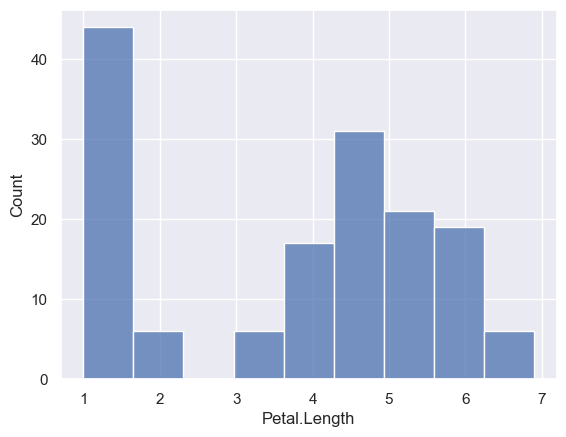

In [4]:
sns.histplot(iris_df['Petal.Length'])

<Axes: xlabel='Sepal.Length', ylabel='Count'>

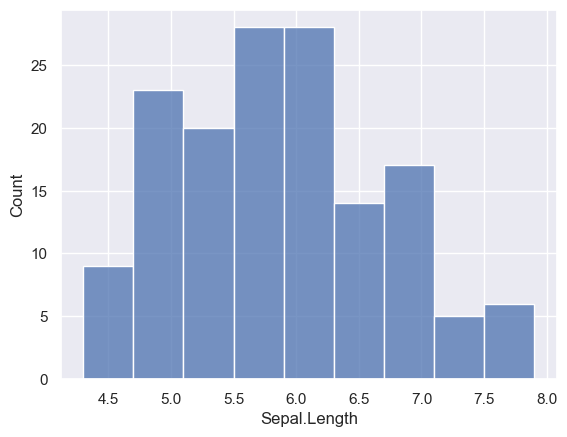

In [5]:
sns.histplot(iris_df['Sepal.Length'])

# Density Plots

Density plots (or more precisely, kernel density plots) are continuous way to visualize distributions.

<Axes: xlabel='Sepal.Length', ylabel='Density'>

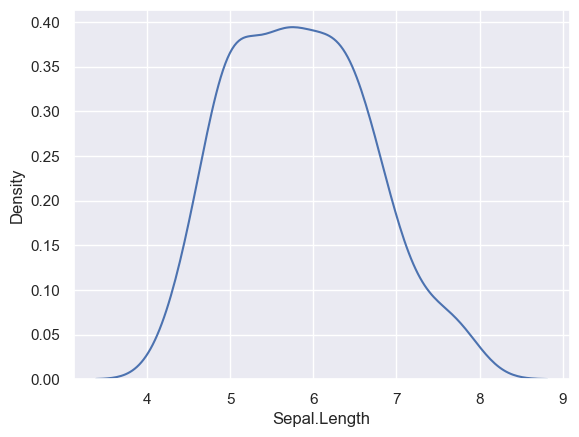

In [6]:
sns.kdeplot(iris_df['Sepal.Length'])


We usually prefer histograms because they show more detail but kernel density plots are useful for interpreting histograms when plotted together.

<Axes: xlabel='Sepal.Length', ylabel='Count'>

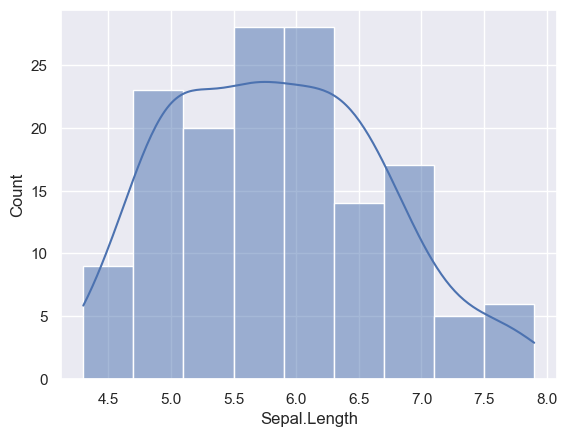

In [7]:
sns.histplot(iris_df['Sepal.Length'], 
             kde=True)

**Observation**: Given the shape of the density plot we suspect that it is describing a number of overlaid underlying distributions.

# Distributions

Distributions tell us how values behave within a particular variable.  In **unimodal** distributions (distributions with one peak) the peak of the distribution often represents the mean or average of the values.

<img src="https://www.statology.org/wp-content/uploads/2021/02/multimodal3.png" height="300" width="400">

The values of the y-axis tell us the likelihood of a particular value occuring in a dataset.

**Multimodal** distributions have more than one peak.  The are often the result of multiple distributions occuring within a single variable.  

Consider the scores of students in a a class. There is a distribution of grades of students who did study and then there is a distribution of students who did not study. Both distributions occuring in the same variable each giving rise to a different peak.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/bimodal-distribution-2.png" height="350" width="400">



## The Normal Distribution

A lot of data follows a **normal distribution**.  Let's take a look what governs the normal distribution.

First is the **mean** $\mu$ defined as,

$$
\mu = \frac{1}{n} \sum_i^n x_i
$$

given a data set defined as
$
\{x_1, x_2, x_3, \dots, x_n\}.
$

Next, we have the **variance** $\sigma^2$ which is defined as the average squared distance of the points in a data set from the mean,

$$
\sigma^2 = \frac{1}{n} \sum_i^n (x_i - \mu)^2
$$

The variance measures how spread out a data set is.  Notice the computation $(x_i - \mu)^2$ which measures the distance squared of point $x_i$
from the mean $\mu$.

Finally, we have the **standard deviation** $\sigma$ which is defined as the square root of the variance and as such relates the spread in data set directly to the distribution curve.  Here is the definition,

$$
\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{n} \sum_i^n (x_i - \mu)^2}
$$

Here is how the standard deviation is related to the normal distribution,

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG"  height="350" width="400">


For the **normal distribution**,

* Data points with values less than or equal to one standard deviation away from the mean account for 68.27% of the points in the dataset

* Data points with values less than or equal to two standard deviations from the mean account for 95.45%

* Data points with values less than or equal to three standard deviations from the mean account for 99.73%.



Therefore, data scientists often describe data points that are further than three standard deviations from the mean as **outliers** because they look differently than 99.73% of the data set.

Here are some distributions with the mean $\mu$ and the variance $\sigma^2$ as parameters,

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/800px-Normal_Distribution_PDF.svg.png"  height="350" width="400">

Notice that distributions with a small variance are "tighter" than distributions with a larger variance.  Also notice that distributions with different means are shifted on the x-axis.

([Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution))

# Bar Charts

Seaborn also supports bar charts called [`countplots`](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot).

<Axes: xlabel='Species', ylabel='count'>

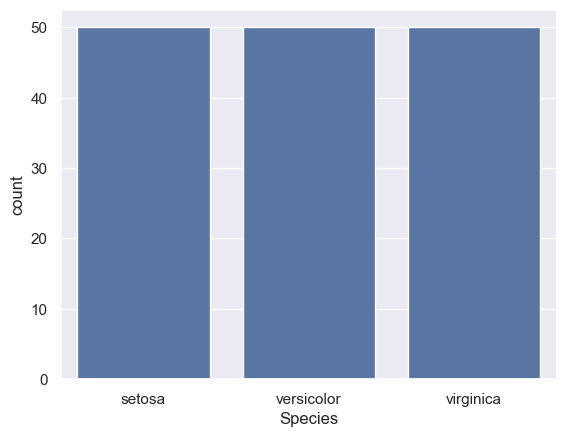

In [8]:
sns.countplot(iris_df, 
              x='Species')

Notice that there is **no preprocessing necessary** compared to the Pandas bar charts.

# Scatter Plots

The **scatterplot** are for illustrating possible relationships such as linearity between two **numeric** variables.

  This is where Seaborn really shines.  The defaults are set up in just the right way to give you maximum information and very attractive graphs. All we have to do is to tell it to use the Species column for colors (the hue parameter).  It does the rest for you.  Also, by default it computes the density plots broken out by label rather than histograms.

<Axes: xlabel='Petal.Width', ylabel='Petal.Length'>

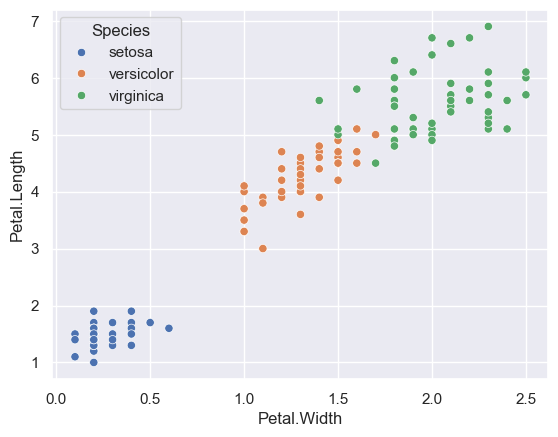

In [9]:
sns.scatterplot(iris_df, 
                x='Petal.Width', 
                y='Petal.Length', 
                hue='Species')

**Observation**: There is a linear relationship between Petal.Width and Petal.Length.  
We can easily imagine drawing a line through the points from the lower left to the upper right corner.

**Observation**: We can clearly see 'setosa' forms a separate cluster (blue dots).

The **pairplot** gives us distribution information in addition to the scatter plots.

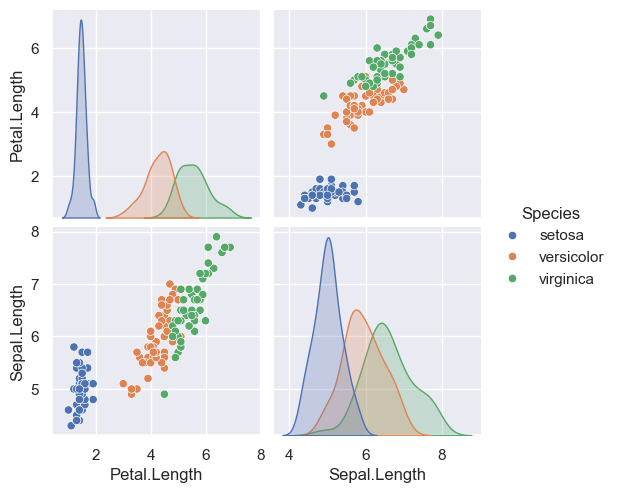

In [10]:
sns.pairplot(iris_df, 
             hue='Species', 
             vars=["Petal.Length", "Sepal.Length"])

**Observation**: Almost linear relationship between Sepal.Length and Petal.Length, except for setos (blue dots)

For small enough datasets we can display all the scatter plots at the same time.

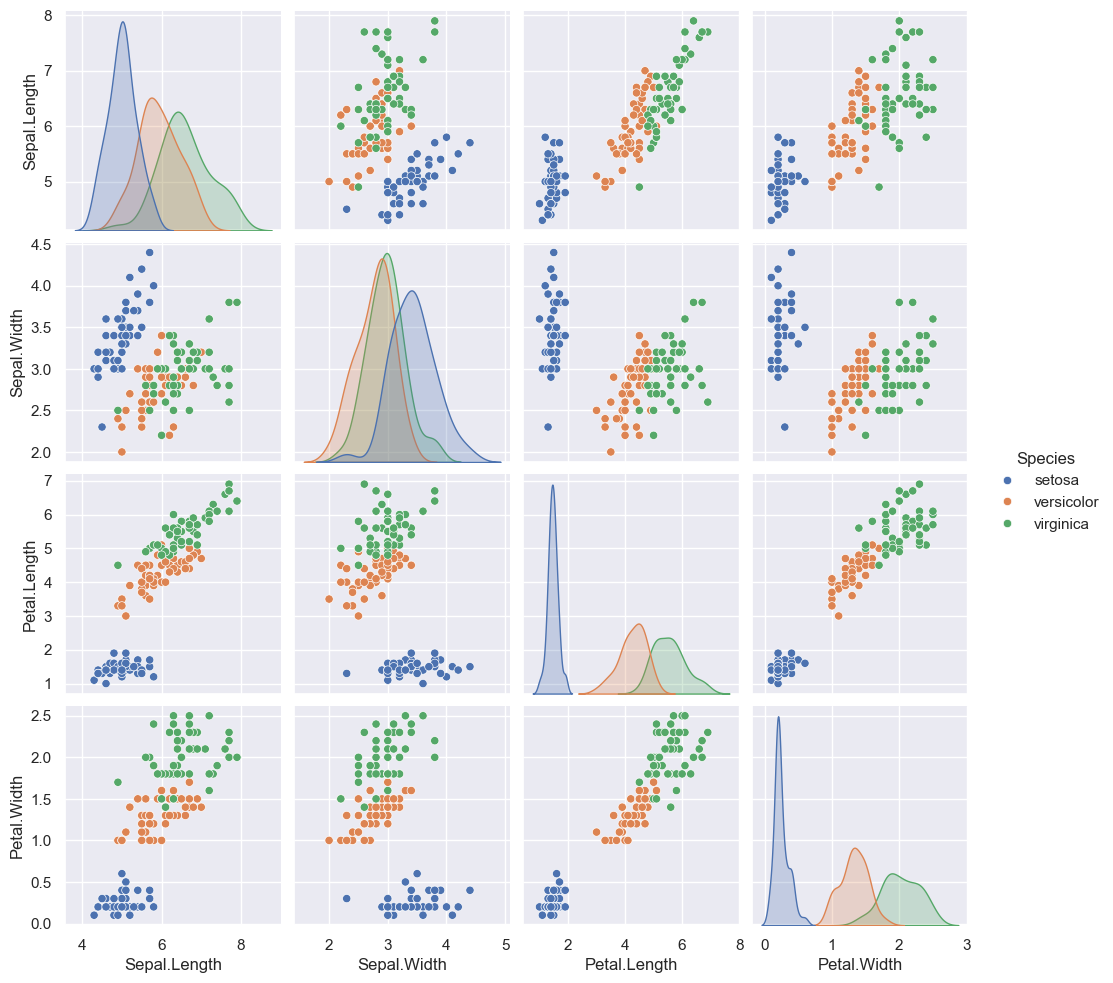

In [11]:
sns.pairplot(iris_df, 
             hue='Species')

# Visualizations of Tree Models

Let's see if we can relate our decision tree model to what we are seeing in the data for the Iris data set.

In [12]:
iris_df = pd.read_csv(home+"iris.csv")

Create the feature matrix and the target vector.

In [13]:
features_df = iris_df.drop(columns=['id','Species'])
features_df.head(n=3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
target_df = iris_df[['Species']]
target_df.head(n=3)

,Species
0,setosa
1,setosa
2,setosa


Build and visualize a tree model.

In [18]:
# we limit the complexity of our model to a depth of 2
dtree = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=2,
                                    random_state=4)
dtree.fit(features_df,target_df)
print(tree.export_text(dtree,
                       feature_names=list(features_df.columns)))

|--- Petal.Length <= 2.45
|   |--- class: setosa
|--- Petal.Length >  2.45
|   |--- Petal.Width <= 1.75
|   |   |--- class: versicolor
|   |--- Petal.Width >  1.75
|   |   |--- class: virginica



We can think of this tree as representing two lines that separate the flowers in Petal.Length and Petal.Width space:

1. if Petal.Length =< 2.45 then setosa
1. if Petal.Width =< 1.75 then versicolor else virginica

Let's plot those rules on top of the scatter plot of the `Petal.Length` and `Petal.Width` variables.  These are the variables that show up in our model above.


<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

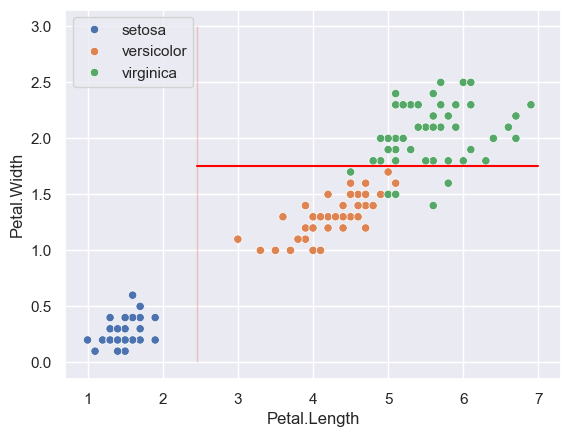

In [16]:
# plot flower data
sns.scatterplot(iris_df, 
                x='Petal.Length', 
                y='Petal.Width', 
                hue='Species')

# plot the model
# if Petal.Length =< 2.45 then setosa
sns.lineplot(x=[2.45,2.45], 
             y=[0,3.0], 
             color='red')

# if Petal.Width =< 1.75 then versicolor else virginica
sns.lineplot(x=[2.45,7.0], 
             y=[1.75,1.75], 
             color='red')

In [17]:
# repeat the model visualization here for easy interpretation on the graph
print(tree.export_text(dtree,
                       feature_names=list(features_df.columns)))

|--- Petal.Length <= 2.45
|   |--- class: setosa
|--- Petal.Length >  2.45
|   |--- Petal.Width <= 1.75
|   |   |--- class: versicolor
|   |--- Petal.Width >  1.75
|   |   |--- class: virginica



Once we plot our tree model ontop of the flower data we find that our model found the patterns in the data that allows the separation of the three classes of iris flowers with minimal errors. The decision tree is also often called a **piecewise linear model** because it induces **linear decision surfaces** within the data.

# Reading

* 4.14 [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
* [Seaborn Homepage](http://seaborn.pydata.org/index.html)


# Project

For details please see Assignment #3 in BrightSpace.